In [16]:
import numpy as np
from PIL import Image
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.preprocessing.text import * # new
from tensorflow.keras.preprocessing.sequence import * #new

word encodings - maintain/keep the sentiment of the words.
word tokens - number representation for each word in lexicon.
therefore some learned contex for each word is possible.

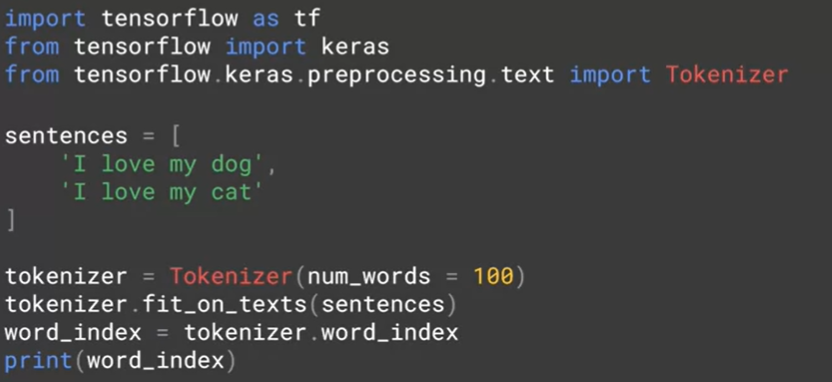

In [2]:
Image.open(r'C:\Users\44788/Desktop\it2.png')

this is the code used in tensorflow to convert words into numbers.

Toeknizer generates dictionaries and creates vectors out of the sentences.
sentences are put into an array. it strips punctuation.

create an instance of the tokenizer. pass parameter num_words. takes top 100 words by volume.

fit_on_texts fits the data and encodes it.

tokenizer.word_index returns the token dictionary.
then you can inspect it by printing it.

In [8]:
sentences = ['I love my dog', 'I love my cat', 'do you think this dog is \
amazing?']
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5, 'do': 6, 'you': 7, 'think': 8, 'this': 9, 'is': 10, 'amazing': 11}


In [10]:
sequences = tokenizer.texts_to_sequences(sentences) # pass any set into this
print(sequences)

[[1, 2, 3, 4], [1, 2, 3, 5], [6, 7, 8, 9, 4, 10, 11]]


In [11]:
# try some non familiar words...
test_data = ['i really love my dog', 'my dog loves my manatee']
test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)

[[1, 2, 3, 4], [3, 4, 3]]


need a lot of training data to get a broad vocab. also give special vlaues to unkown workds

In [13]:
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq) # 1 represents unknown words

[[2, 1, 3, 4, 5], [4, 5, 1, 4, 1]]


need to resize the sentences (like resizing images with the generator) so we can feed sentences of the same input length into NNs. for this we use padding

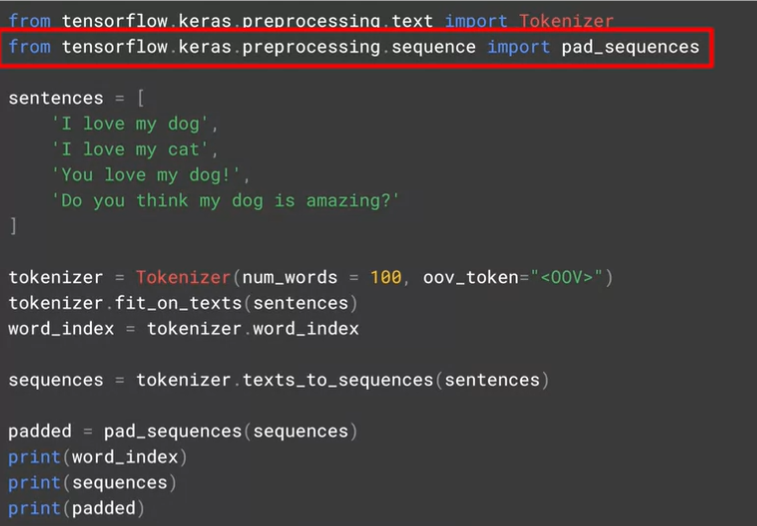

In [14]:
Image.open(r'C:\Users\44788/Desktop\it3.png')

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded = pad_sequences(sequences, padding='post')
print(padded) # now each row has the same length 

[[ 1  2  3  4  0  0  0]
 [ 1  2  3  5  0  0  0]
 [ 6  7  8  9  4 10 11]]


In [19]:
padded = pad_sequences(sequences, padding='post', maxlen=5)
print(padded) # however some information will be lost 

[[ 1  2  3  4  0]
 [ 1  2  3  5  0]
 [ 8  9  4 10 11]]


# Sarcasm, really?
1 if sentence is sarcastic, 0 if not.
looks at BBC headlines
data looks like this:

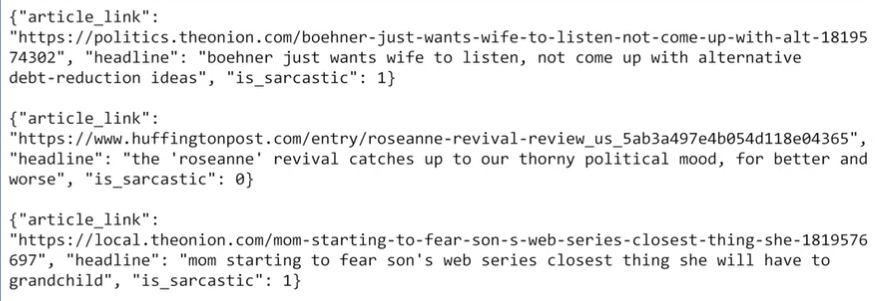

In [20]:
Image.open(r'C:\Users\44788/Desktop\it4.png')

In [29]:
file = r'C:\Users\44788\Desktop\OctaveML\Sarcasm_Headlines_Dataset.json'
import json 
import json
data = [json.loads(line) for line in open(file, 'r')]

In [32]:
sentences = []
labels = []
urls = []
for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [34]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)
